### Delivery Market Modeling

* Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

### Assignment

* The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

* The company wants to understand and process the data coming out of data engineering pipelines:

* Clean, sanitize and manipulate data to get useful features out of raw fields;
* Make sense of the raw data and help the data science team to build forecasting models on it.

### Data Description

* delhivery_data.csv contains records of deliveries prepared by the data engineering department for modeling and has the following columns:

* data – tells whether the data is testing or training data
* trip_creation_time – Timestamp of trip creation
* route_schedule_uuid – unique Id for a particular route schedule
* route_type – transportation type:
* FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
* Carting – handling system consisting of small vehicles (carts)
* trip_uuid - unique ID given to a particular trip (A trip may include different source and destination centers)
* source_center – ID of a trip origin point
* source_name – the name of a trip origin point
* destination_center – destination ID
* destination_name – destination Name
* od_start_time – trip start time
* od_end_time – trip end time
* start_scan_to_end_scan – time taken to deliver from source to destination
* is_cutoff – unknown field
* cutoff_factor – unknown field
* cutoff_timestamp – unknown field
* actual_distance_to_destination – the distance in kilometers between the source and destination
* actual_time – actual time taken to complete the delivery (cumulative)
* osrm_time – an open-source routing engine time calculator which computes the shortest path between points in a given map (given usual traffic) and gives the time estimate (cumulative)
* osrm_distance – an open-source routing engine that computes the distance of the shortest path between points in a given map (cumulative)
* factor – unknown field
* segment_actual_time – time taken by a segment of the package delivery
* segment_osrm_time – the OSRM segment time
* segment_osrm_distance – the OSRM distance for a segment
* segment_factor – unknown field

In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import os
import calendar


# Data Modeling
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

# DATA VISUALIZATION

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
np.set_printoptions(suppress=True)
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation

### Usage of the Libraries, Function and Classes

pandas: This library is commonly used for data manipulation and analysis. It provides data structures like DataFrames, which allow you to store and manipulate tabular data efficiently.

numpy : This library provides support for working with arrays and numerical operations in Python. It is often used for mathematical computations and data manipulation tasks.

os : This library provides functions for interacting with the operating system. It allows you to perform operations such as file and directory management.

calendar : This library provides various calendar-related functionalities. It includes functions for working with dates, months, and years.

matplotlib : It provides a wide range of functions for creating static, animated, and interactive visualizations. The pyplot module provides a MATLAB-like interface for creating plots and visualizations.

seaborn : This library is built on top of Matplotlib and provides a high-level interface for creating attractive and informative statistical graphics. It simplifies the process of creating visualizations by providing default themes and improved plot aesthetics.

plotly.express : This library provides a high-level interface for creating interactive visualizations. It allows you to create a wide range of plots, including scatter plots, line plots, bar charts, and more.

plotly.subplots: These modules are part of the Plotly library and provide additional functionality for creating subplots and customizing plot objects.

statsmodels.tsa.seasonal : This module is part of the statsmodels library and provides functions for performing seasonal decomposition of time series data. It helps in analyzing and understanding the seasonal patterns present in the data.

matplotlib.ticker: This module provides classes and functions for customizing tick locations and tick labels on plots created with Matplotlib.

In [2]:
# Creating the function that take path as string to a CSV and load it into pandas data frame
def load_data(filename: str, path : str = "C:/Users/Krishan Singh/Desktop/Delivery Market Modeling/") -> pd.DataFrame:
    df = pd.read_csv(path + filename + ".csv")
    return df


In [3]:
all_data = load_data("delhivery_data")

In [4]:
all_data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [5]:
all_data.count()

data                              144867
trip_creation_time                144867
route_schedule_uuid               144867
route_type                        144867
trip_uuid                         144867
source_center                     144867
source_name                       144574
destination_center                144867
destination_name                  144606
od_start_time                     144867
od_end_time                       144867
start_scan_to_end_scan            144867
is_cutoff                         144867
cutoff_factor                     144867
cutoff_timestamp                  144867
actual_distance_to_destination    144867
actual_time                       144867
osrm_time                         144867
osrm_distance                     144867
factor                            144867
segment_actual_time               144867
segment_osrm_time                 144867
segment_osrm_distance             144867
segment_factor                    144867
dtype: int64

In [6]:
def meta_data(data):
    return pd.DataFrame({
        "Datatype": data.dtypes.astype(str),
        "Count_Null": data.isnull().sum().astype(int),
        "Null_Percentage":round((data.isnull().sum())/len(data)* 100,2),
        "Unique_values" : data.nunique().astype(int)
    }).sort_values(by = 'Null_Percentage', ascending = False)
meta_data(all_data)

,Datatype,Count_Null,Null_Percentage,Unique_values
source_name,object,293,0.20,1498
destination_name,object,261,0.18,1468
data,object,0,0.00,2
cutoff_factor,int64,0,0.00,501
segment_osrm_distance,float64,0,0.00,113799
segment_osrm_time,float64,0,0.00,214
segment_actual_time,float64,0,0.00,747
factor,float64,0,0.00,45641
osrm_distance,float64,0,0.00,138046
osrm_time,float64,0,0.00,1531


In [7]:
all_data['source_name'].fillna('No Data (Unknown)', inplace=True)
all_data['destination_name'].fillna('No Data (Unknown)', inplace=True)

In [8]:
# train_data = all_data.query('data == "training"') 
# train_data.head()

In [9]:
# #test_data = all_data[all_data['data'] == 'test'] This is the second methord to get the filter
# test_data = all_data.query('data == "test"') 
# test_data.head()

In [10]:
print(all_data['data'].count())


144867


In [11]:
meta_data(all_data)

,Datatype,Count_Null,Null_Percentage,Unique_values
data,object,0,0.0,2
trip_creation_time,object,0,0.0,14817
segment_osrm_distance,float64,0,0.0,113799
segment_osrm_time,float64,0,0.0,214
segment_actual_time,float64,0,0.0,747
factor,float64,0,0.0,45641
osrm_distance,float64,0,0.0,138046
osrm_time,float64,0,0.0,1531
actual_time,float64,0,0.0,3182
actual_distance_to_destination,float64,0,0.0,144515


In [12]:
''' Convert 'trip_creation_time',
 'od_start_time',
 'od_end_time',
 'cutoff_timestamp' column to datetime'''
    
all_data['trip_creation_time'] = pd.to_datetime(all_data['trip_creation_time'])

all_data['od_start_time'] = pd.to_datetime(all_data['od_start_time'])

all_data['od_end_time'] = pd.to_datetime(all_data['od_end_time'])

all_data['cutoff_timestamp'] = pd.to_datetime(all_data['cutoff_timestamp'])

In [13]:
# Remove unnecessary columns as they are unknown field
columns_to_drop = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
data_clean = all_data.drop(columns=columns_to_drop)

In [14]:
# Feature engineering
data_clean['average_speed'] = data_clean['actual_distance_to_destination'] / data_clean['actual_time']
data_clean['efficiency'] = data_clean['osrm_distance'] / data_clean['actual_distance_to_destination']

# Calculate average segment delivery time
#data_clean['avg_segment_time'] = data_clean['segment_actual_time'] / data_clean['segment_osrm_distance']

# Calculate average speed
data_clean['osrm_avg_speed'] = data_clean['osrm_distance'] / (data_clean['osrm_time'] / 3600)

# Calculate segment speed
#data_clean['segment_speed'] = data_clean['segment_osrm_distance'] / (data_clean['segment_actual_time'] / 3600)

In [15]:
meta_data(data_clean)

,Datatype,Count_Null,Null_Percentage,Unique_values
data,object,0,0.0,2
trip_creation_time,datetime64[ns],0,0.0,14817
efficiency,float64,0,0.0,144515
average_speed,float64,0,0.0,144516
segment_osrm_distance,float64,0,0.0,113799
segment_osrm_time,float64,0,0.0,214
segment_actual_time,float64,0,0.0,747
osrm_distance,float64,0,0.0,138046
osrm_time,float64,0,0.0,1531
actual_time,float64,0,0.0,3182


In [16]:
meta_data(data_clean)

,Datatype,Count_Null,Null_Percentage,Unique_values
data,object,0,0.0,2
trip_creation_time,datetime64[ns],0,0.0,14817
efficiency,float64,0,0.0,144515
average_speed,float64,0,0.0,144516
segment_osrm_distance,float64,0,0.0,113799
segment_osrm_time,float64,0,0.0,214
segment_actual_time,float64,0,0.0,747
osrm_distance,float64,0,0.0,138046
osrm_time,float64,0,0.0,1531
actual_time,float64,0,0.0,3182


array([[<Axes: title={'center': 'trip_creation_time'}>,
        <Axes: title={'center': 'od_start_time'}>,
        <Axes: title={'center': 'od_end_time'}>,
        <Axes: title={'center': 'start_scan_to_end_scan'}>],
       [<Axes: title={'center': 'actual_distance_to_destination'}>,
        <Axes: title={'center': 'actual_time'}>,
        <Axes: title={'center': 'osrm_time'}>,
        <Axes: title={'center': 'osrm_distance'}>],
       [<Axes: title={'center': 'segment_actual_time'}>,
        <Axes: title={'center': 'segment_osrm_time'}>,
        <Axes: title={'center': 'segment_osrm_distance'}>,
        <Axes: title={'center': 'average_speed'}>],
       [<Axes: title={'center': 'efficiency'}>,
        <Axes: title={'center': 'osrm_avg_speed'}>, <Axes: >, <Axes: >]],
      dtype=object)

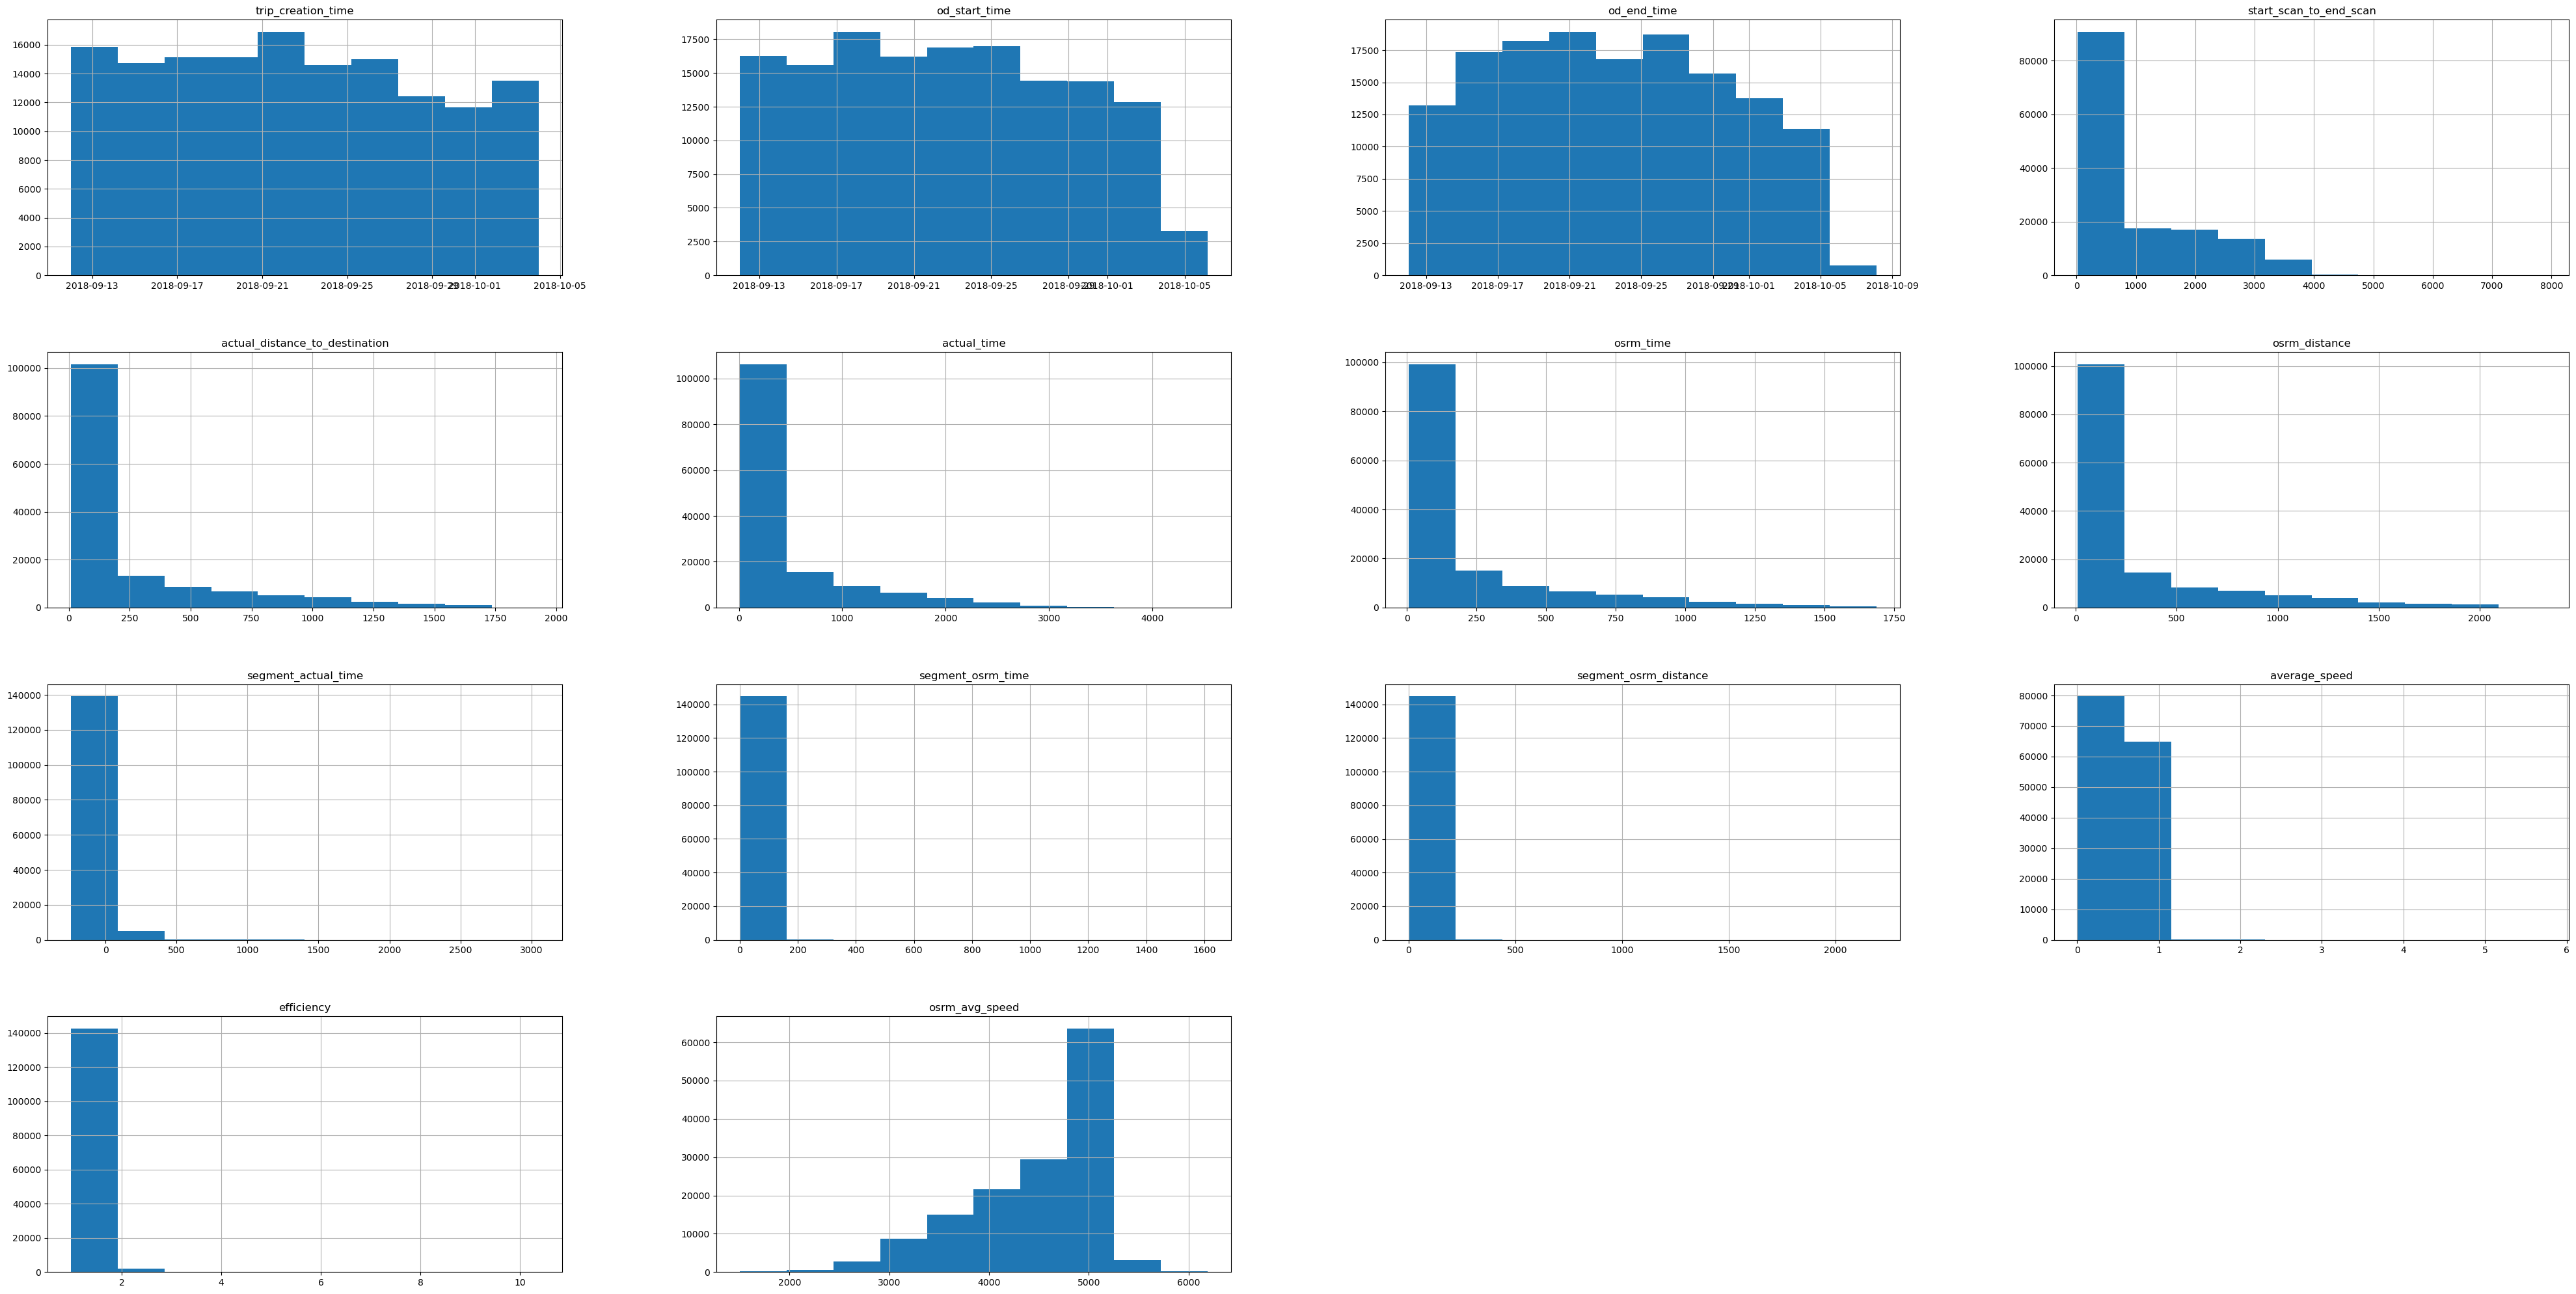

In [17]:
data_clean.hist(figsize=(50,25))

#### Histograms tell more on Column distribution,outlier existence and column value range



* 'trip_creation_time': The graph reveals that the highest number of trips were created between September 21, 2018, and September 23, 2018.

* 'od_start_time': From the graph, it's evident that September 17, 2018, recorded the highest number of trip start times.

* 'od_end_time': The graph highlights that the maximum number of trip end times occurred on September 21, 2018, and September 26, 2018.

* 'start_scan_to_end_scan': The majority of the data falls within the range of 0-1000 for start scan to end scan times.

* 'actual_distance_to_destination': Most of the actual distances to destinations are concentrated within the range of 0-200 kilometers or less.

* 'actual_time': The graph shows that the majority of deliveries took approximately 1000 minutes or less to complete.

* 'osrm_time': It's noticeable that the timing for most deliveries, as indicated by the 'osrm_time', falls within the range of 0-100 minutes.

* 'osrm_distance': The graph illustrates that the majority of deliveries have an 'osrm_distance' ranging from 0 to 250 kilometers.
       '

We can obviously see outliers in various columns like segment_actual_time, segment_osrm_time and segment_osrm_distance  etc. which is better to check and perhaps remove to get better averaging and overview of the column and data

In [18]:
copy_data = data_clean.copy()

In [19]:
outlier_cols=['segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
copy_data[outlier_cols].describe()

,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.00000
mean,36.196111,18.507548,22.82902
std,53.571158,14.775960,17.86066
min,-244.000000,0.000000,0.00000
25%,20.000000,11.000000,12.07010
50%,29.000000,17.000000,23.51300
75%,40.000000,22.000000,27.81325
max,3051.000000,1611.000000,2191.40370


In [20]:
# Sort your data from low to high.
# Identify the first quartile (Q1), the median, and the third quartile (Q3).
# Calculate your IQR = Q3 – Q1.
# Calculate your upper fence = Q3 + (1.5 * IQR)
# Calculate your lower fence = Q1 – (1.5 * IQR)
#Interquartile Range (IQR)


def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1  
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers


def print_outliers(df):
    outliers = find_outliers_IQR(df)
    if len(outliers)>0.0:
        print(df.name)
        print('number of outlier : '+ str(len(outliers)))
        print('max of outlier : '+ str(outliers.max()))
        print('min of outlier : '+ str(outliers.min()) + '\n')
        
        print(df.shape)
        
def remove_outliers(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    lower_fence = q1-1.5*iqr
    upper_fence = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name]>lower_fence) & (df_in[col_name] < upper_fence)]
    return df_out
    



In [21]:
#copy_data.loc[(copy_data['route_type'] == "Carting") & (copy_data['source_name'] == "Del_Okhla_PC (Delhi)")].head()

In [22]:
for col in copy_data.select_dtypes(exclude = object):
    print_outliers(copy_data[col])

start_scan_to_end_scan
number of outlier : 373
max of outlier : 7898.0
min of outlier : 3897.0

(144867,)
actual_distance_to_destination
number of outlier : 17992
max of outlier : 1927.4477046975032
min of outlier : 682.00011881217

(144867,)
actual_time
number of outlier : 16633
max of outlier : 4532.0
min of outlier : 1207.0

(144867,)
osrm_time
number of outlier : 17603
max of outlier : 1686.0
min of outlier : 603.0

(144867,)
osrm_distance
number of outlier : 17816
max of outlier : 2326.1991000000003
min of outlier : 813.1202

(144867,)
segment_actual_time
number of outlier : 9298
max of outlier : 3051.0
min of outlier : -244.0

(144867,)
segment_osrm_time
number of outlier : 6378
max of outlier : 1611.0
min of outlier : 39.0

(144867,)
segment_osrm_distance
number of outlier : 4315
max of outlier : 2191.4037000000003
min of outlier : 51.4296

(144867,)
average_speed
number of outlier : 2882
max of outlier : 5.740356504109546
min of outlier : 0.007249117816407539

(144867,)
efficie

In [23]:
cleaned_data = copy_data.copy()  # Create a copy of the original data

for col in cleaned_data.select_dtypes(exclude=[object]):
    cleaned_data = remove_outliers(cleaned_data, col)


array([[<Axes: title={'center': 'trip_creation_time'}>,
        <Axes: title={'center': 'od_start_time'}>,
        <Axes: title={'center': 'od_end_time'}>,
        <Axes: title={'center': 'start_scan_to_end_scan'}>],
       [<Axes: title={'center': 'actual_distance_to_destination'}>,
        <Axes: title={'center': 'actual_time'}>,
        <Axes: title={'center': 'osrm_time'}>,
        <Axes: title={'center': 'osrm_distance'}>],
       [<Axes: title={'center': 'segment_actual_time'}>,
        <Axes: title={'center': 'segment_osrm_time'}>,
        <Axes: title={'center': 'segment_osrm_distance'}>,
        <Axes: title={'center': 'average_speed'}>],
       [<Axes: title={'center': 'efficiency'}>,
        <Axes: title={'center': 'osrm_avg_speed'}>, <Axes: >, <Axes: >]],
      dtype=object)

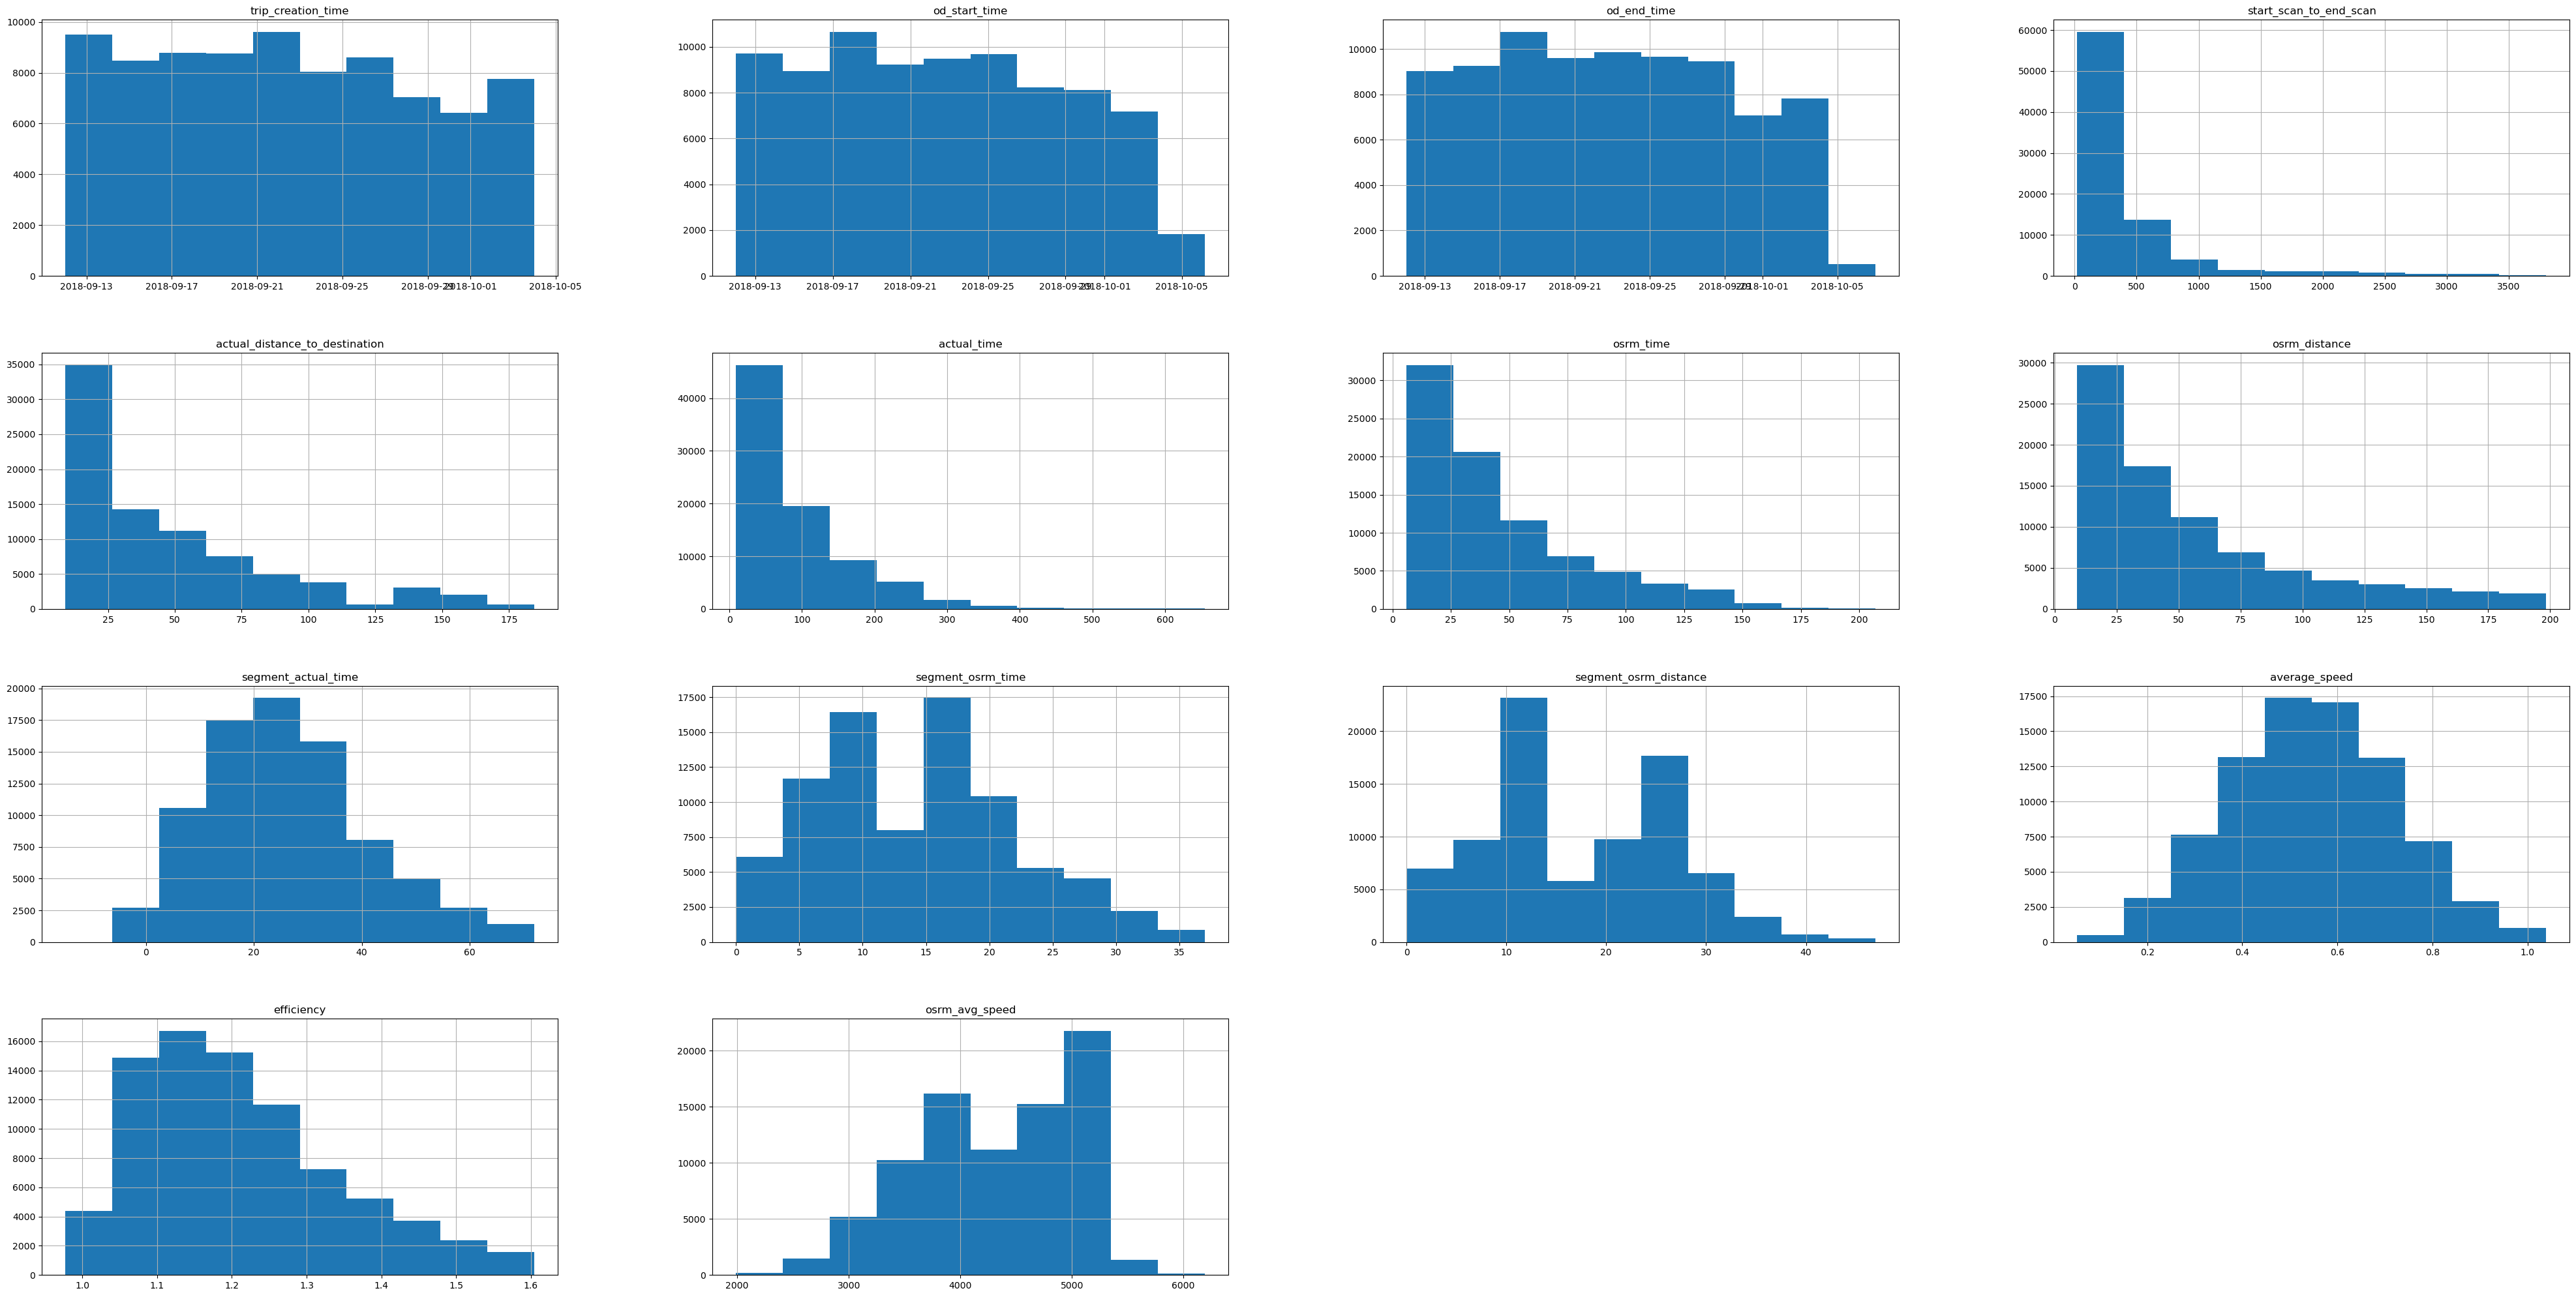

In [24]:
cleaned_data.hist(figsize=(50,25))

### Distribution of Route Types:

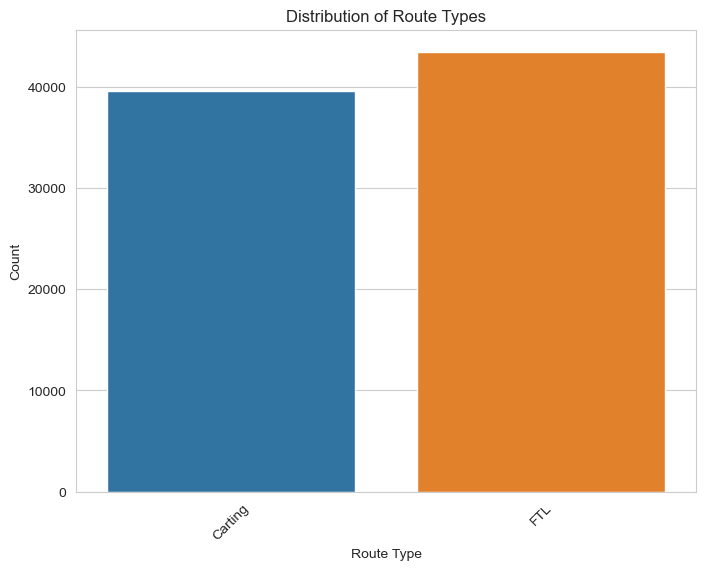

In [25]:
# Set style for smoother edges (can be adjusted to other styles as well)
sns.set_style("whitegrid")

# Create a smaller figure and control dpi for pixel density
plt.figure(figsize=(8, 6), dpi=100)


# Create the countplot
sns.countplot(data=cleaned_data, x='route_type')

# Customize plot labels, title, and rotation
plt.title('Distribution of Route Types')
plt.xlabel('Route Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Display the plot
plt.show()


 The graph reveals that the highest number of transportation type on the FTL (Full Truck Load)

 ### Trip Duration

Text(0.5, 0, 'Trip Duration (minutes)')

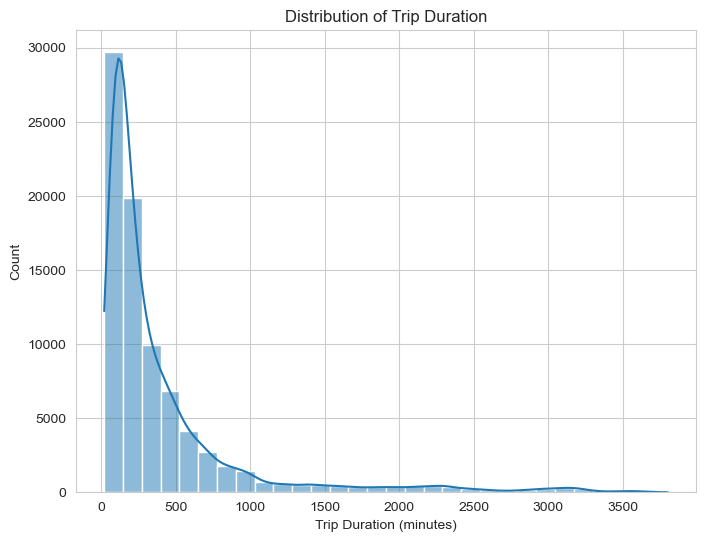

In [26]:
cleaned_data['trip_duration'] = pd.to_datetime(cleaned_data['od_end_time']) - pd.to_datetime(cleaned_data['od_start_time'])
cleaned_data['trip_duration_minutes'] = cleaned_data['trip_duration'].dt.total_seconds() / 60
# Set style for smoother edges (can be adjusted to other styles as well)
sns.set_style("whitegrid")

# Create a smaller figure and control dpi for pixel density
plt.figure(figsize=(8, 6), dpi=100)
sns.histplot(data=cleaned_data, x='trip_duration_minutes', bins=30, kde=True)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (minutes)')

The graph reveals that the Most of the Trip duration in between 125 minutes

#### Relationship between Distance and Time

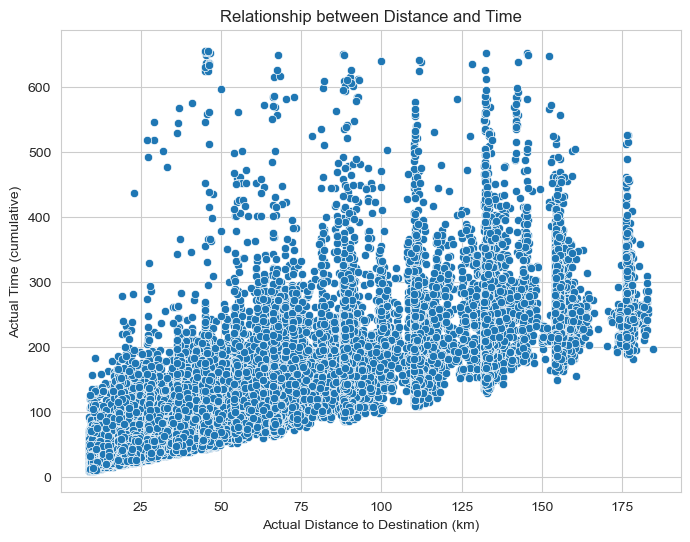

In [27]:
# Set style for smoother edges (can be adjusted to other styles as well)
sns.set_style("whitegrid")

# Create a smaller figure and control dpi for pixel density
plt.figure(figsize=(8, 6), dpi=100)
sns.scatterplot(data=cleaned_data, x='actual_distance_to_destination', y='actual_time')
plt.title('Relationship between Distance and Time')
plt.xlabel('Actual Distance to Destination (km)')
plt.ylabel('Actual Time (cumulative)')
plt.show()


#### Average Speed Distribution:

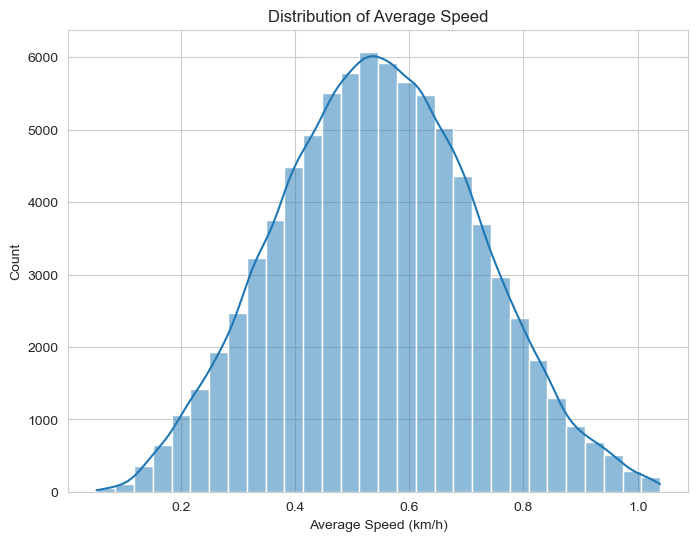

In [28]:
# Set style for smoother edges (can be adjusted to other styles as well)
sns.set_style("whitegrid")

# Create a smaller figure and control dpi for pixel density
plt.figure(figsize=(8, 6), dpi=100)
sns.histplot(data=cleaned_data, x='average_speed', bins=30, kde=True)
plt.title('Distribution of Average Speed')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Count')
plt.show()


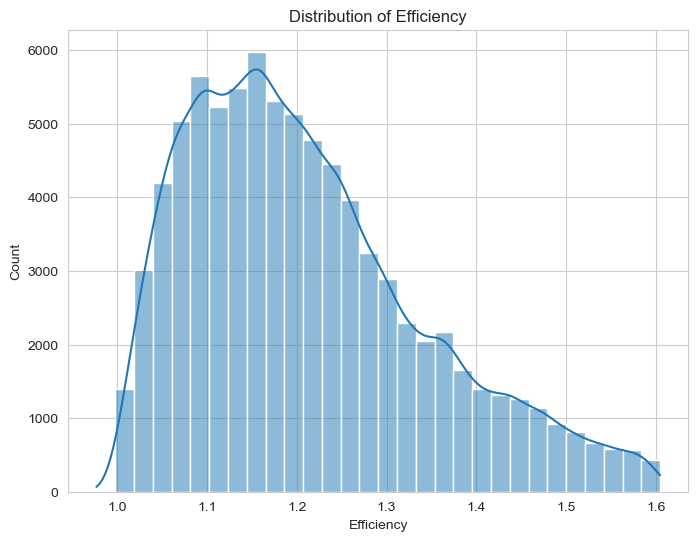

In [29]:
# Set style for smoother edges (can be adjusted to other styles as well)
sns.set_style("whitegrid")

# Create a smaller figure and control dpi for pixel density
plt.figure(figsize=(8, 6), dpi=100)
sns.histplot(data=cleaned_data, x='efficiency', bins=30, kde=True)
plt.title('Distribution of Efficiency')
plt.xlabel('Efficiency')
plt.ylabel('Count')
plt.show()


C:\Users\Krishan Singh\AppData\Local\Temp\ipykernel_780\1330616645.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cleaned_data.corr()


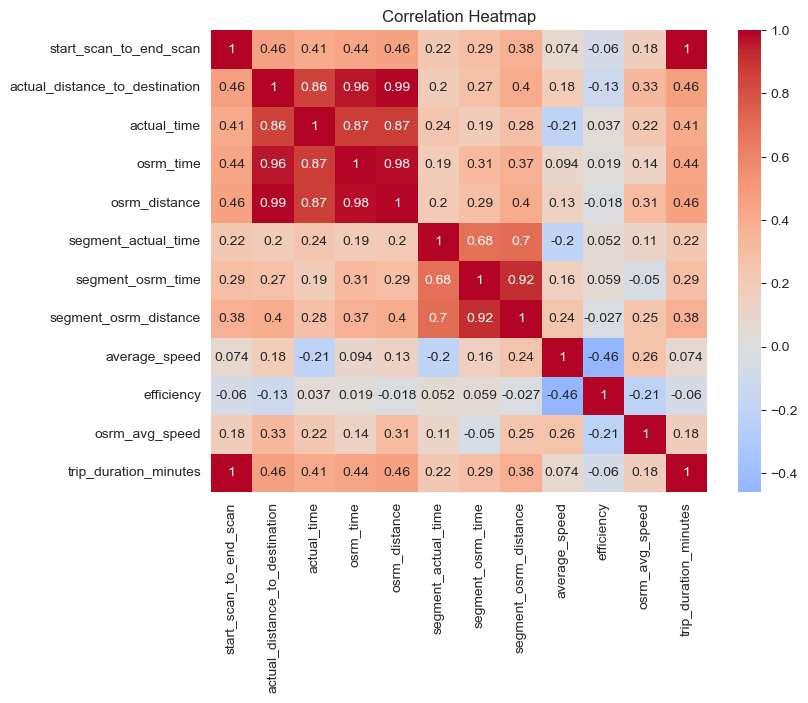

In [30]:
# Set style for smoother edges (can be adjusted to other styles as well)
sns.set_style("whitegrid")

# Create a smaller figure and control dpi for pixel density
plt.figure(figsize=(8, 6), dpi=100)
corr_matrix = cleaned_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

This Heatmap shows that the following column are highly positive correlation between two variables.
1. start_scan_to_end_scan vs trip_duration_minutes shows the high
2. actual_time vs actual_distance_to_destination
3. osrm_time vs actual_distance_to_destination
4. osrm_distance vs actual_distance_to_destination
5. osrm_time vs actual_time
6. osrm_distance vs osrm_time
7. segment_osrm_time vs segment_actual_time
8. segment_osrm_time vs segment_osrm_distance

### Time Series Analysis

In [31]:
cleaned_data['od_start_time'] = pd.to_datetime(cleaned_data['od_start_time'])
cleaned_data['od_end_time'] = pd.to_datetime(cleaned_data['od_end_time'])
cleaned_data['trip_creation_time'] = pd.to_datetime(cleaned_data['trip_creation_time'])

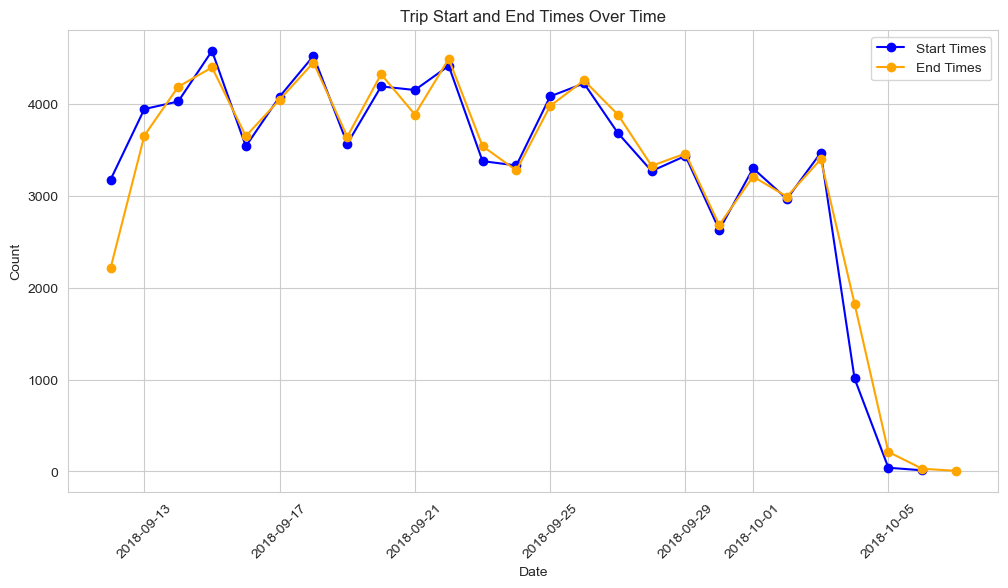

In [32]:
start_time_counts = cleaned_data.groupby(cleaned_data['od_start_time'].dt.date).size()
end_time_counts = cleaned_data.groupby(cleaned_data['od_end_time'].dt.date).size()

# Plot trip start times and end times
plt.figure(figsize=(12, 6))
plt.plot(start_time_counts.index, start_time_counts.values, label='Start Times', marker='o', linestyle='-', color='blue')
plt.plot(end_time_counts.index, end_time_counts.values, label='End Times', marker='o', linestyle='-', color='orange')
plt.title('Trip Start and End Times Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Seasonal Decomposition

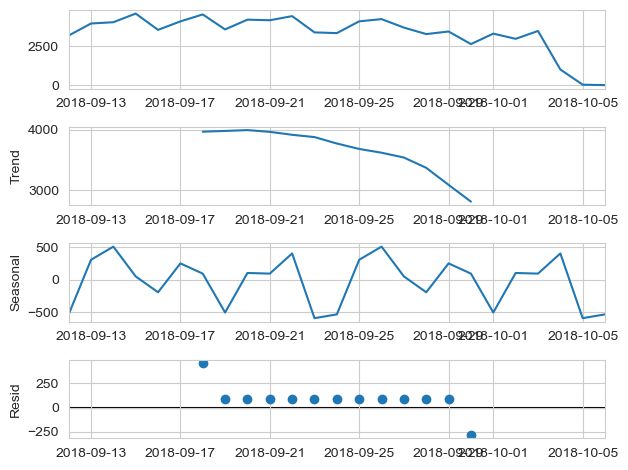

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
start_time_decomposition = seasonal_decompose(start_time_counts, model='additive', period=12)

# Plot the decomposition
start_time_decomposition.plot()
plt.show()

In [34]:
# As you can see in 'destination_name' column we can get the city name in seperate column
cleaned_data['des_city_name'] = cleaned_data['destination_name'].str.split('(').str[-1].str.rstrip(')')

#Another way .str.extract(r'\((.*?)\)')

# Display the updated 'destination_name' column
cleaned_data.head()


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,average_speed,efficiency,osrm_avg_speed,trip_duration,trip_duration_minutes,des_city_name
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,14.0,11.0,11.9653,0.745404,1.146578,3915.916364,0 days 01:26:12.818197,86.213637,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,10.0,9.0,9.7590,0.789035,1.147198,3910.374000,0 days 01:26:12.818197,86.213637,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,16.0,7.0,10.8152,0.690932,1.177377,4183.650000,0 days 01:26:12.818197,86.213637,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,21.0,12.0,13.0224,0.582549,1.261475,4100.580000,0 days 01:26:12.818197,86.213637,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,6.0,5.0,3.9153,0.579206,1.376582,4436.026364,0 days 01:26:12.818197,86.213637,Gujarat


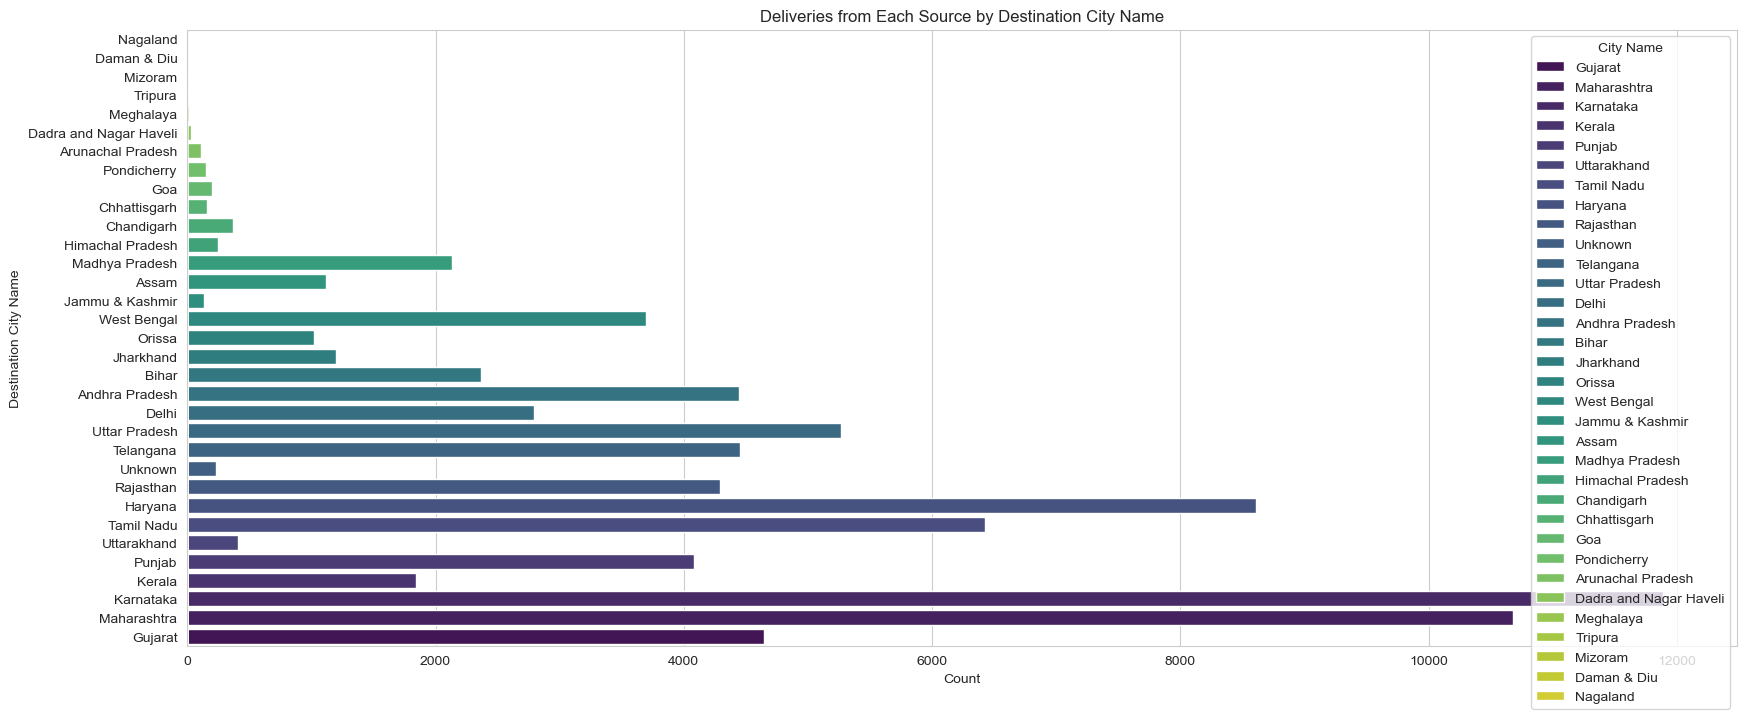

In [35]:
# Increase the figure's width and height to provide more space for labels
plt.figure(figsize=(20, 8))

# Create a countplot with adjusted spacing
ax = sns.countplot(data=cleaned_data, y='des_city_name', hue='des_city_name', palette='viridis', dodge=False)
plt.title('Deliveries from Each Source by Destination City Name')
plt.xlabel('Count')
plt.ylabel('Destination City Name')

# Adjust the legend
plt.legend(title='City Name', loc='upper right')

# Reverse the Y-axis to display the city with the highest count at the top
plt.gca().invert_yaxis()

plt.show()

    The Deliveries from Each Source by City Name Graph represent that the Karnataka have the highest no of deliveries followed by Maharashrta and Haryana. 

In [36]:
# As you can see in 'destination_name' column we can get the city name in seperate column
cleaned_data['source_city_name'] = cleaned_data['source_name'].str.split('(').str[-1].str.rstrip(')')

#Another way .str.extract(r'\((.*?)\)')

# Display the updated 'destination_name' column
cleaned_data.head()


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,average_speed,efficiency,osrm_avg_speed,trip_duration,trip_duration_minutes,des_city_name,source_city_name
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,0.745404,1.146578,3915.916364,0 days 01:26:12.818197,86.213637,Gujarat,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.0,9.0,9.7590,0.789035,1.147198,3910.374000,0 days 01:26:12.818197,86.213637,Gujarat,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,16.0,7.0,10.8152,0.690932,1.177377,4183.650000,0 days 01:26:12.818197,86.213637,Gujarat,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.0,12.0,13.0224,0.582549,1.261475,4100.580000,0 days 01:26:12.818197,86.213637,Gujarat,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,6.0,5.0,3.9153,0.579206,1.376582,4436.026364,0 days 01:26:12.818197,86.213637,Gujarat,Gujarat


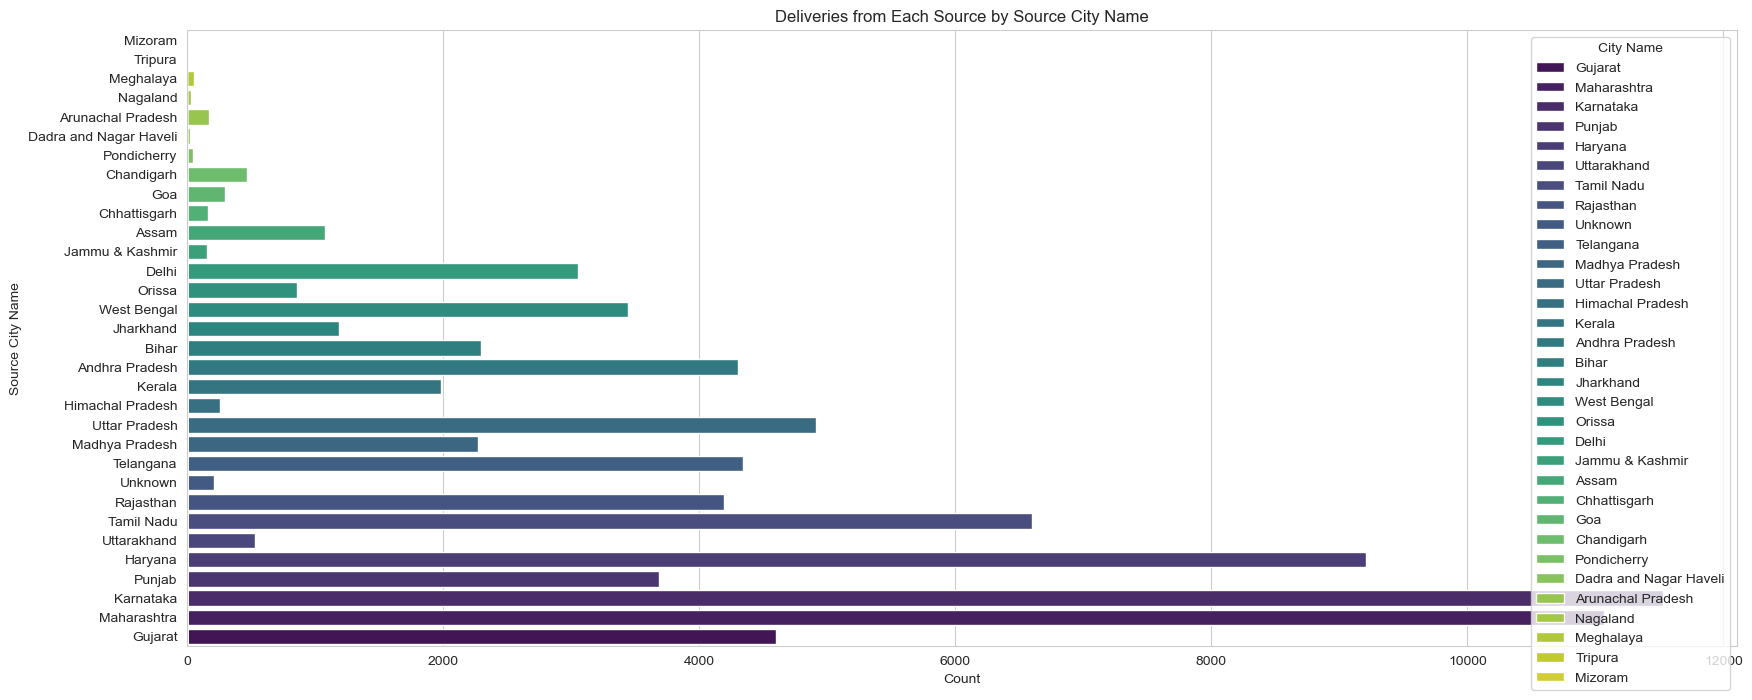

In [37]:
# Increase the figure's width and height to provide more space for labels
plt.figure(figsize=(20, 8))

# Create a countplot with adjusted spacing
ax = sns.countplot(data=cleaned_data, y='source_city_name', hue='source_city_name', palette='viridis', dodge=False)
plt.title('Deliveries from Each Source by Source City Name')
plt.xlabel('Count')
plt.ylabel('Source City Name')

# Adjust the legend
plt.legend(title='City Name', loc='upper right')

# Reverse the Y-axis to display the city with the highest count at the top
plt.gca().invert_yaxis()

plt.show()

The Deliveries from Each Source by Source City Name Graph represent that the Karnataka have the sale the highets no of item followed by Maharashrta and Haryana. 

### Segment Analysis

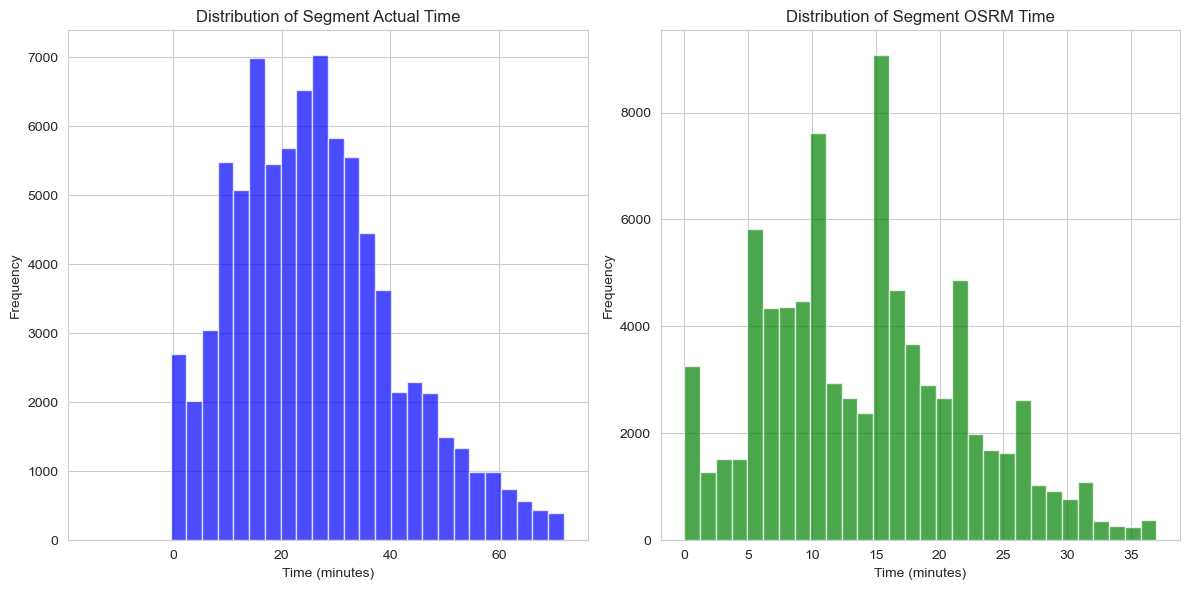

In [38]:
# Create histograms for 'segment_actual_time' and 'segment_osrm_time'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(cleaned_data['segment_actual_time'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Segment Actual Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(cleaned_data['segment_osrm_time'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Segment OSRM Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [39]:
# Calculate summary statistics for 'segment_actual_time' and 'segment_osrm_time'
segment_actual_time_stats = cleaned_data['segment_actual_time'].describe()
segment_osrm_time_stats = cleaned_data['segment_osrm_time'].describe()

print("Segment Actual Time Summary Statistics:\n", segment_actual_time_stats)
print("\nSegment OSRM Time Summary Statistics:\n", segment_osrm_time_stats)


Segment Actual Time Summary Statistics:
 count    83009.000000
mean        26.086304
std         14.884562
min        -15.000000
25%         14.000000
50%         25.000000
75%         35.000000
max         72.000000
Name: segment_actual_time, dtype: float64

Segment OSRM Time Summary Statistics:
 count    83009.000000
mean        14.312111
std          7.826327
min          0.000000
25%          8.000000
50%         14.000000
75%         19.000000
max         37.000000
Name: segment_osrm_time, dtype: float64


In [40]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(cleaned_data['segment_actual_time'], cleaned_data['segment_osrm_time'])
print("Mann-Whitney U Test p-value:", p_value)

if p_value < 0.05:
    print("The distributions are significantly different.")
else:
    print("There is no significant difference between the distributions.")


Mann-Whitney U Test p-value: 0.0
The distributions are significantly different.


A Mann-Whitney U test p-value of 0.0 signifies that there is strong evidence to conclude that the two groups being compared have significantly different distributions. 

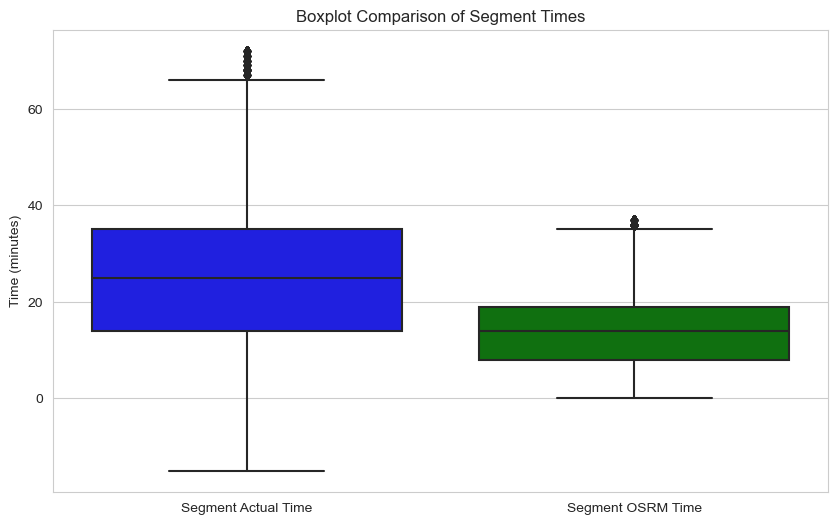

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data[['segment_actual_time', 'segment_osrm_time']], palette=['blue', 'green'])
plt.title('Boxplot Comparison of Segment Times')
plt.ylabel('Time (minutes)')
plt.xticks(ticks=[0, 1], labels=['Segment Actual Time', 'Segment OSRM Time'])
plt.show()


Short boxes mean their data points consistently hover around the center values. Taller boxes imply more variable data. But you can see that the Median is not similar this suggests that the two datasets have different typical or average values. If one median is significantly higher than the other, it suggests positive skewness (the data is skewed to the right), while if one median is significantly lower, it suggests negative skewness (the data is skewed to the left).

In [42]:
import scipy.stats as stats

# Assuming you have a DataFrame 'df' with 'trip_duration_minutes' and 'route_type' columns
ftl_duration = cleaned_data[cleaned_data['route_type'] == 'FTL']['trip_duration_minutes']
carting_duration = cleaned_data[cleaned_data['route_type'] == 'Carting']['trip_duration_minutes']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(ftl_duration, carting_duration, equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha (significance level)
if p_value < alpha:
    print("There is a significant difference in trip duration between FTL and Carting routes.")
else:
    print("There is no significant difference in trip duration between FTL and Carting routes.")


T-statistic: 115.55679897796762
P-value: 0.0
There is a significant difference in trip duration between FTL and Carting routes.


The trip durations for these two route types are not equal, and the difference is not likely due to random chance. This finding suggests that the route type (FTL or Carting) has a significant impact on trip duration, and further investigation or analysis may be needed to understand the reasons behind this difference.

### Feature Engineering


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting relevant features
features = ['average_speed', 'efficiency', 'segment_osrm_time','actual_distance_to_destination', 'osrm_avg_speed']

tn_data = cleaned_data.query('data == "training"')
train_data = tn_data.drop('data', axis=1)  # Remove the 'data' column without inplace=True


#test_data = all_data[all_data['data'] == 'test'] 
tt_data = cleaned_data.query('data == "test"') 
test_data = tt_data.drop('data', axis=1)

# Training the model
model = LinearRegression()
model.fit(train_data[features], train_data['actual_time'])

# Predicting on the test set
predictions = model.predict(test_data[features])

# Evaluating the model
mse = mean_squared_error(test_data['actual_time'], predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 855.4819563863854


Random Forest Mean Squared Error: 2.97693354876129


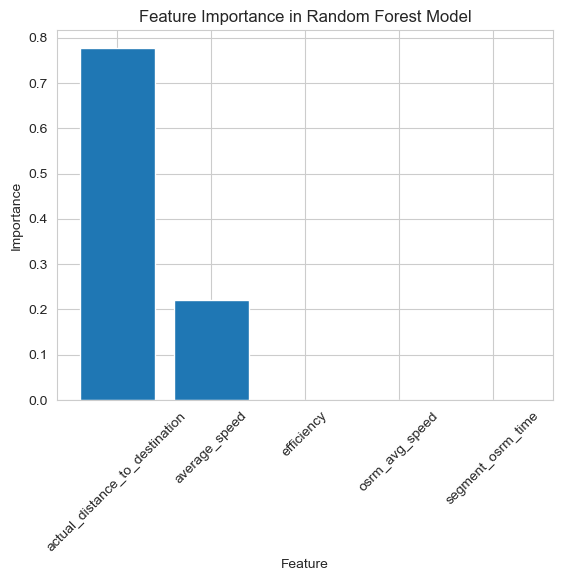

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


features = ['average_speed', 'efficiency', 'segment_osrm_time','actual_distance_to_destination', 'osrm_avg_speed']
X = train_data[features]
y = train_data['actual_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest Mean Squared Error: {rf_mse}')

# Visualize feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=features)
feature_importances.sort_values(ascending=False, inplace=True)
plt.bar(feature_importances.index, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.xticks(rotation=45)
plt.show()

In [45]:
test_pred = rf_model.predict(test_data[features])

In [46]:
# Evaluate the Random Forest model
yf_test = test_data['actual_time']
rf2_mse = mean_squared_error(yf_test, test_pred)
print(f'Random Forest Mean Squared Error: {rf2_mse}')



Random Forest Mean Squared Error: 7.278748603697007
